In [1]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [37]:
%pip install --user -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in c:\users\julia\miniconda3\lib\site-packages (1.0.2)
Requirement already up-to-date: scipy in c:\users\julia\miniconda3\lib\site-packages (1.7.3)
  Using cached https://files.pythonhosted.org/packages/df/3f/6093a23565d0f50ce433f56223fcc34af6c912cd4331dc582ba29d9b5a17/matplotlib-3.5.3-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np
import dateutil.parser
from matplotlib import dates
from matplotlib import pyplot as plt
import datetime as dt
from datetime import timedelta

xls = pd.read_excel('Resources-and-Energy-Quarterly-September-2022-Historical-Data.xls')

### copper jistorical data
df1 = pd.read_excel('Resources-and-Energy-Quarterly-September-2022-Historical-Data.xls', sheet_name='25', skiprows=6)

columns_to_keep = [x for x in range(df1.shape[1]) if x not in [0,1,2,3,4,6,7,8,13]]
df1 = df1.iloc[:, columns_to_keep]
df1 = df1.dropna(how='all')

df1.columns = df1.iloc[0] 
df1.columns = pd.to_datetime(df1.columns)
#df1.columns = ['Gold', 2021, 2022, 2023, 2024]
df1.set_index('NaT', inplace=True)
df1.head(35)

,1990-03-01,1990-06-01,1990-09-01,1990-12-01,1991-06-01,1991-09-01,1991-12-01,1992-03-01,1992-06-01,1992-09-01,...,2020-03-01,2020-06-01,2020-09-01,2020-12-01,2021-03-01,2021-06-01,2021-09-01,2021-12-01,2022-03-01,2022-06-01
NaT,,,,,,,,,,,,,,,,,,,,,
NaN,1990-03-01 00:00:00,1990-06-01 00:00:00,1990-09-01 00:00:00,1990-12-01 00:00:00,1991-06-01 00:00:00,1991-09-01 00:00:00,1991-12-01 00:00:00,1992-03-01 00:00:00,1992-06-01 00:00:00,1992-09-01 00:00:00,...,2020-03-01 00:00:00,2020-06-01 00:00:00,2020-09-01 00:00:00,2020-12-01 00:00:00,2021-03-01 00:00:00,2021-06-01 00:00:00,2021-09-01 00:00:00,2021-12-01 00:00:00,2022-03-01 00:00:00,2022-06-01 00:00:00
Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mine s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Copper ore and concentrates b,na,na,na,na,256.675,na,na,na,264.506,368.515,...,898.171,897.407,843.011,814.018,854.41,901.463,748.376,721.383,792.199,825.696
Copper content of all minerals produced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New South Wales c,5.547,8.885,9.259,8.055,9.147,10.014,10.476,11.441,9.012,11.372,...,52.686,56.835,54.195,57,52.3429,55.9809,40.1929,41.8184,45.4959,52.5819
Queensland c,46.643,52.473,61.097,49.413,48.245,58.267,41.949,48.147,43.597,69.933,...,49.1397,61.153,52.8536,49.0252,48.1485,54.5907,54.233,49.44,41.297,39.0479
Western Australia c,1.78,4.205,4.506,3.132,1.993,4.073,3.391,1.891,1.621,2.264,...,45.8134,39.8742,34.1149,35.2559,36.4195,36.89,34.437,38.254,40.092,41.642
South Australia,9.026,10.311,11.108,12.768,12.509,14.344,16.591,15.942,20.846,18.689,...,68.3868,74.6622,71.5469,74.7584,80.364,81.928,61.471,54.105,74.97,77.158


In [2]:
### Copper production forecast
df2 = pd.read_excel('Resources-and-Energy-Quarterly-September-2022-Forecast-Data.xls', sheet_name='Copper', skiprows=6)

columns_to_keep = [x for x in range(df2.shape[1]) if x not in [0,1,2,3,4,6,11,12,13,14, 15, 16, 17]]
df2 = df2.iloc[:, columns_to_keep]
df2 = df2.dropna(how='all')

df2.columns = df2.iloc[0] 
df2.columns = ['Copper', 2021, 2022, 2023, 2024]
df2.set_index('Copper', inplace=True)
df2.head(25)

,2021,2022,2023,2024
Copper,,,,
NaN,2021,2022 f,2023 f,2024 f
World,NaN,NaN,NaN,NaN
Production,NaN,NaN,NaN,NaN
– mine,21025.4,22160.8,23180.2,24014.7
– refined,25014.6,25547.7,26339.6,26892.8
Consumption,25251.3,25544.9,26483.1,27296.7
Closing stocks,1148.37,941.552,1347.88,1595.26
– weeks of consumption,2.36483,1.91665,2.64658,3.03896
Price LME,NaN,NaN,NaN,NaN


c:\users\julia\miniconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6


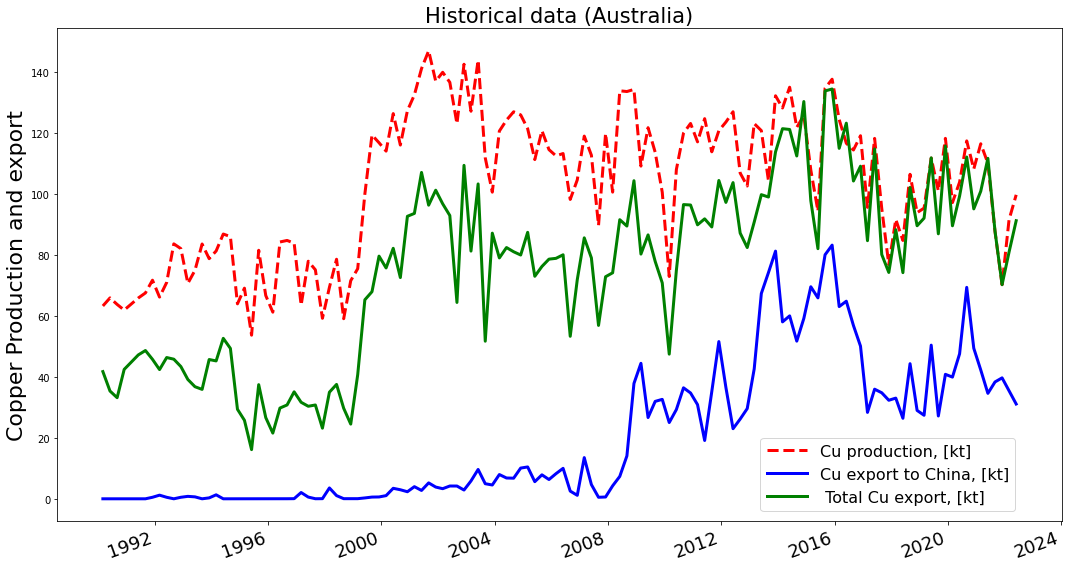

In [5]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import sklearn
from sklearn import linear_model
#df1.columns = pd.to_datetime(df1.columns)

#df1.columns=df1.columns.map(dt.datetime.toordinal)

X = df1.columns

cu_production = df1.iloc[13, :]
cu_China_export =  df1.iloc[24, :]
cu_total_export=  df1.iloc[34, :]

fig, ax = plt.subplots(figsize = (15, 8), facecolor=None)

#ax.plot(X, ni_production, color = 'b')
ax.plot(X, cu_production, 'r--',  linewidth=3, label='Cu production, [kt]')
ax.plot(X, cu_China_export, 'b',  linewidth=3, label='Cu export to China, [kt]')
ax.plot(X, cu_total_export, 'g',  linewidth=3, label=' Total Cu export, [kt]')

"""

X1 = df2.columns.values.reshape(-1, 1)  # values converts it into a numpy array
Y1 = df2.iloc[13, :].values.reshape(-1, 1)  
lr = linear_model.LinearRegression().fit(X1,Y1)
lr.predict(X1)
plt.plot(X, linear_regressor.predict(X1), color='blue', linewidth=3)
"""
plt.setp(ax.get_xticklabels(), rotation=20, fontsize=18, ha="right")
#ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Copper Production and export', fontsize=22)

ax.legend(loc=(0.7, 0.02), handlelength=2.5, fontsize=16)

plt.title('Historical data (Australia)', fontsize=21)

#plt.legend(fontsize=18)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), prop={'size':14}, fancybox=True, shadow=True)
  
plt.tight_layout()
plt.savefig('Cu historical data', fmt='png', dpi=200)
plt.show()